<a href="https://colab.research.google.com/github/coder-j-0090/Self_Study/blob/main/Project/Personal_Project/Email_Spam_Detection/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Email Spam Detection

It's possible to detect if the email is spam or not depends on the title of email. This Machine Learning model will detect each words(Natural Language) in the text(title) and change it to numerical value. Then, it will distinguish if it's spam or not.


In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
spam = pd.read_csv('/content/drive/MyDrive/Internship/Accepted/Oasis_Infobyte_02152024~03152024 /Data Science Internship/DataSets/spam.csv', encoding='latin-1')
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#v1 and v2 are not proper name, so it should be changed to target and text
spam.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
spam.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#Check to make sure if target has only spam and ham(non-spam)
spam.target.unique()

array(['ham', 'spam'], dtype=object)

#Preprocessing : Remove Punctuation

### Process

    1. Check if each letter in the string is punctuation, and only save the ones that are not punctuations in the list
    2. Combine them as a sentence
    3. Change the string to save in each line

In [6]:
#Before removing punctuation(special symbol), import and check what punctuation there are
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
#Create a method that will save the letter in the list if it's not a punctuation. Then, change the list into string
def remove_punc(x):
    new_string=[]
    for i in x:
        if i not in string.punctuation:
            new_string.append(i)

    new_string = ''.join(new_string)
    return new_string

In [8]:
#Apply the method to spam dataset

remove_punc(spam.text)

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'sU dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcvEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneWINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R enti

In [9]:
#Function remove_punc() is desgined to work at one line. Therefore, change it to apply each line of the series. Use apply()
spam.text.apply(remove_punc)

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                  Will Ì b going to esplanade fr home
5569    Pity  was in mood for that Soany other suggest...
5570    The guy did some bitching but I acted like id ...
5571                            Rofl Its true to its name
Name: text, Length: 5572, dtype: object

In [10]:
#Apply the previous method to text column in spam dataset
spam.text = spam.text.apply(remove_punc)

#Preprocessing : Stopword Removal

### Process
    1. Change saved strings in series to list with words
    2. Save in lower case if it's not a stopwords
    3. Combine them altogether
    4. Repeat the process

In [11]:
#Import stopwords from nltk library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
#Check what kind of stopwords there are in English stopwords
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
#Distinguish if it's stopwords, then change every letters to lower case because Python finds the difference between upper and lower case
#To apply everything in entire spam.text column, make another function for it and use apply()

def stop_words(x):
    new_string = []
    for i in x.split():
        #Check if x is stopwords when it's lowercase words.
        if i.lower() not in stopwords.words('english'):
            new_string.append(i.lower())
    new_string = ' '.join(new_string)
    return new_string

#Apply stop_words
spam.text = spam.text.apply(stop_words)
spam.text

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u å£750 pound prize...
5568                          ì b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: text, Length: 5572, dtype: object

#Preprocessing : Change the form of column

    - string type data might cause problems, so it should be changed to numerical form. map() function will be used.

In [14]:
#Change spam and ham. If it's spam, it should be 1 and if it's ham, then it should be 0

#Convert text to number
spam.target = spam.target.map({'spam':1, 'ham':0})
#Print and check
spam.target

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

#Preprocessing : CountVectorizer

    - Based on the number of text, it can be vectorize. Gather all the information in data as a dictionary, assign index,
    then count index of the word each time the word is found

In [15]:
x = spam.text
y = spam.target

In [16]:
#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Train with fit() then change it to transform()
cv = CountVectorizer()
#Train
cv.fit(spam.text)
#In the variable x, save the value of transformed spam.text
x = cv.transform(spam.text)
#Print word and index
cv.vocabulary_

{'go': 3764,
 'jurong': 4652,
 'point': 6381,
 'crazy': 2482,
 'available': 1401,
 'bugis': 1864,
 'great': 3861,
 'world': 9107,
 'la': 4809,
 'buffet': 1862,
 'cine': 2198,
 'got': 3821,
 'amore': 1168,
 'wat': 8871,
 'ok': 5946,
 'lar': 4848,
 'joking': 4620,
 'wif': 9003,
 'oni': 5978,
 'free': 3556,
 'entry': 3141,
 'wkly': 9059,
 'comp': 2314,
 'win': 9017,
 'fa': 3278,
 'cup': 2537,
 'final': 3402,
 'tkts': 8314,
 '21st': 453,
 'may': 5294,
 '2005': 440,
 'text': 8153,
 '87121': 865,
 'receive': 6777,
 'questionstd': 6669,
 'txt': 8521,
 'ratetcs': 6721,
 'apply': 1254,
 '08452810075over18s': 71,
 'dun': 2993,
 'say': 7132,
 'early': 3013,
 'hor': 4189,
 'already': 1142,
 'nah': 5637,
 'dont': 2902,
 'think': 8227,
 'goes': 3778,
 'usf': 8667,
 'lives': 5010,
 'around': 1305,
 'though': 8246,
 'freemsg': 3564,
 'hey': 4085,
 'darling': 2601,
 'weeks': 8925,
 'word': 9093,
 'back': 1451,
 'id': 4308,
 'like': 4960,
 'fun': 3627,
 'still': 7796,
 'tb': 8083,
 'xxx': 9232,
 'std': 

In [17]:
#Transform the data x transform()
print(x)

  (0, 1168)	1
  (0, 1401)	1
  (0, 1862)	1
  (0, 1864)	1
  (0, 2198)	1
  (0, 2482)	1
  (0, 3764)	1
  (0, 3821)	1
  (0, 3861)	1
  (0, 4652)	1
  (0, 4809)	1
  (0, 6381)	1
  (0, 8871)	1
  (0, 9107)	1
  (1, 4620)	1
  (1, 4848)	1
  (1, 5946)	1
  (1, 5978)	1
  (1, 9003)	1
  (2, 71)	1
  (2, 440)	1
  (2, 453)	1
  (2, 865)	1
  (2, 1254)	1
  (2, 2314)	1
  :	:
  (5568, 3169)	1
  (5568, 3543)	1
  (5568, 3783)	1
  (5568, 4156)	1
  (5569, 5523)	1
  (5569, 6307)	1
  (5569, 7547)	1
  (5569, 7922)	1
  (5570, 988)	1
  (5570, 1649)	1
  (5570, 1899)	1
  (5570, 3085)	1
  (5570, 3556)	1
  (5570, 3676)	1
  (5570, 3922)	1
  (5570, 4308)	1
  (5570, 4444)	1
  (5570, 4960)	1
  (5570, 5731)	1
  (5570, 7572)	1
  (5570, 8657)	1
  (5570, 8920)	1
  (5571, 5643)	1
  (5571, 6996)	1
  (5571, 8468)	1


In [18]:
#Check the 0th row data
spam.loc[0]['text']

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [19]:
#Check if it actually work
print(cv.vocabulary_['go'])
print(cv.vocabulary_['jurong'])
print(cv.vocabulary_['point'])

3764
4652
6381


In [20]:
#Use train_test_split to train the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=100)

Since it's hard to clearly find out the data distribution of the dataset, all the Naive Bayes models should be used, and the best one will be chosen.

#First Naive Bayes : MultinomialNB

In [23]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)
mnb_pred = mnb_model.predict(X_test)

In [25]:
from sklearn import metrics
metrics.classification_report(y_test, mnb_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.98       970\n           1       0.86      0.94      0.89       145\n\n    accuracy                           0.97      1115\n   macro avg       0.92      0.96      0.94      1115\nweighted avg       0.97      0.97      0.97      1115\n'

In [26]:
#Print the accuracy score of Multinomial Naive Bayes
print(metrics.accuracy_score(y_test, mnb_pred))

0.9713004484304932


In [28]:
#Check with confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, mnb_pred))

[[947  23]
 [  9 136]]


<Axes: >

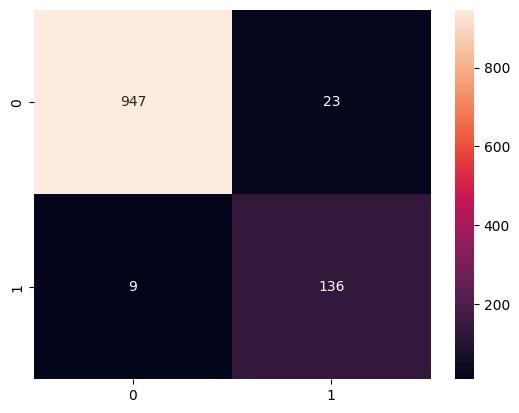

In [29]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, mnb_pred), annot=True, fmt = '.0f')

# Confusion Matrix

Top right is Type 1 Error and Bottom left is Type 2 Error. Type 1 Error is False Positive and Type 2 Error is False Negative.

For example,

    - Spam Detection will be better with Type 2 Error than Type 1 Error. Type 2 Error is classifying an email as non-spam but it actually was. Although it could be annoying, it will decrease the chance of putting important mail in spam folder.
    - Cancer Detection Machine will have more serious issue with Type 2 Error because if patient doesn't know about cancer, it could be worse.


# Second Naive Bayes : Gaussian Naive Bayes

In [33]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()
gnb_model.fit(X_train_dense, y_train)
gnb_pred = gnb_model.predict(X_test_dense)

In [35]:
from sklearn import metrics
metrics.classification_report(y_test, gnb_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.88      0.93       970\n           1       0.54      0.92      0.68       145\n\n    accuracy                           0.89      1115\n   macro avg       0.76      0.90      0.81      1115\nweighted avg       0.93      0.89      0.90      1115\n'

In [36]:
#Print the accuracy score of Gaussian Naive Bayes
print(metrics.accuracy_score(y_test, gnb_pred))

0.8878923766816144


In [37]:
#Check with confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, mnb_pred))

[[947  23]
 [  9 136]]


<Axes: >

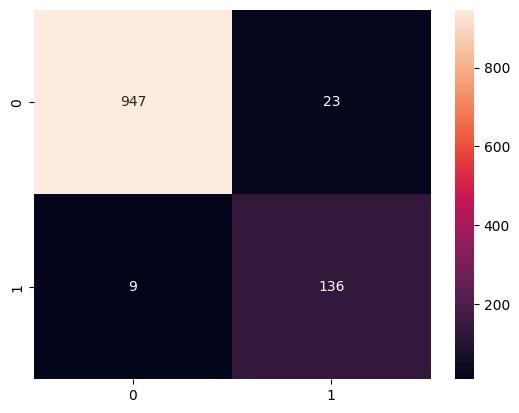

In [38]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, mnb_pred), annot=True, fmt = '.0f')

#Third Naive Bayes : Bernoulli Naive Bayes

In [41]:
#Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb_model = BernoulliNB()
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()
bnb_model.fit(X_train_dense, y_train)
bnb_pred = bnb_model.predict(X_test_dense)

In [42]:
from sklearn import metrics
metrics.classification_report(y_test, bnb_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       970\n           1       0.98      0.86      0.92       145\n\n    accuracy                           0.98      1115\n   macro avg       0.98      0.93      0.95      1115\nweighted avg       0.98      0.98      0.98      1115\n'

In [43]:
#Print the accuracy score of Bernoulli Naive Bayes
print(metrics.accuracy_score(y_test, bnb_pred))

0.979372197309417


In [46]:
#Check with confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, bnb_pred))

[[968   2]
 [ 21 124]]


<Axes: >

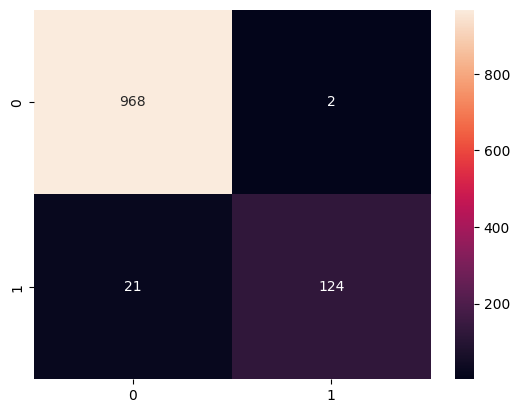

In [47]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, bnb_pred), annot=True, fmt = '.0f')

In [49]:
#Print the accuracy score of Multinomial Naive Bayes
print('Multinomial Naive Bayes Accuracy Score: ',metrics.accuracy_score(y_test, mnb_pred))
#Print the accuracy score of Gaussian Naive Bayes
print('Gaussian Naive Bayes Accuracy Score: ',metrics.accuracy_score(y_test, gnb_pred))
#Print the accuracy score of Bernoulli Naive Bayes
print('Bernoulli Naive Bayes Accuracy Score: ',metrics.accuracy_score(y_test, bnb_pred))

Multinomial Naive Bayes Accuracy Score:  0.9713004484304932
Gaussian Naive Bayes Accuracy Score:  0.8878923766816144
Bernoulli Naive Bayes Accuracy Score:  0.979372197309417
